In [77]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import random
import pickle
import os

In [19]:
print(os.getcwd())

/home/dyab/Documents/AI/Tensorflow/cats_dogs_real_images


In [30]:
data_dir = os.getcwd() + '/kagglecatsanddogs/PetImages'
categories = ['Dog', 'Cat']

In [48]:
path = os.path.join(data_dir, categories[0])
path

'/home/dyab/Documents/AI/Tensorflow/cats_dogs_real_images/kagglecatsanddogs/PetImages/Dog'

In [49]:
len(os.listdir(path))

12501

In [52]:
path = os.path.join(data_dir, categories[1])
len(os.listdir(path))

12501

(375, 500)


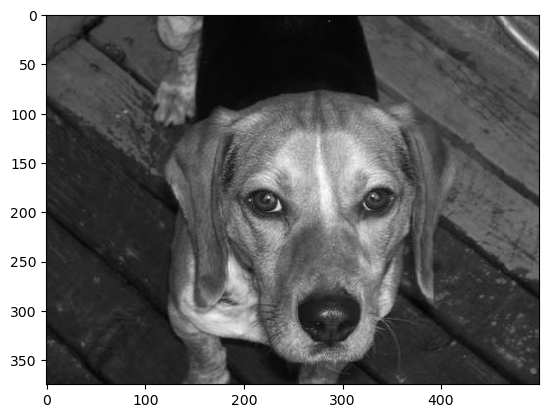

In [25]:
for categeory in categories:
    path = os.path.join(data_dir, categeory)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img), 0)
        plt.imshow(img, cmap='gray')
        print(img.shape)
        break
    break

(40, 40)


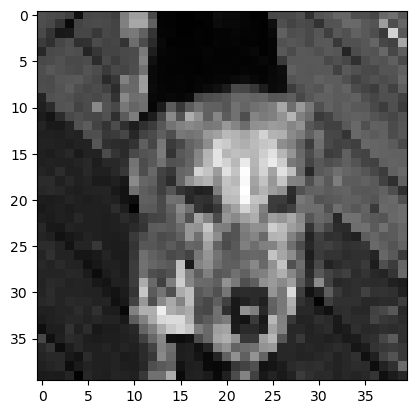

In [29]:
image_size = 40

new_img = cv2.resize(img, (image_size, image_size))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [50]:
def create_training_data(data_dir, categories, image_size = 40):

    training_data = []
    for categeory in categories:    
        path = os.path.join(data_dir, categeory)
        class_num = categories.index(categeory)

        
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,img), 0)
                new_img = cv2.resize(img, (image_size, image_size))
                training_data.append([new_img, class_num])
            except:
                pass

    
    return training_data

In [51]:
data_dir = os.getcwd() + '/kagglecatsanddogs/PetImages'
categories = ['Dog', 'Cat']
training_data = create_training_data(data_dir, categories)

Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


In [53]:
len(training_data)

24946

In [54]:
training_data[0]

[array([[ 77,  74,  73, ...,  99, 106,  84],
        [ 76,  71,  55, ..., 145,  76,  97],
        [ 72,  55,  29, ...,  59, 193,  84],
        ...,
        [ 40,  44,  43, ...,  65,  81,  58],
        [ 37,  40,  44, ...,  38,  50, 102],
        [ 32,  33,  32, ...,  22,  33,  43]], dtype=uint8),
 0]

In [55]:
training_data[0][0]

array([[ 77,  74,  73, ...,  99, 106,  84],
       [ 76,  71,  55, ..., 145,  76,  97],
       [ 72,  55,  29, ...,  59, 193,  84],
       ...,
       [ 40,  44,  43, ...,  65,  81,  58],
       [ 37,  40,  44, ...,  38,  50, 102],
       [ 32,  33,  32, ...,  22,  33,  43]], dtype=uint8)

In [56]:
training_data[0][1]

0

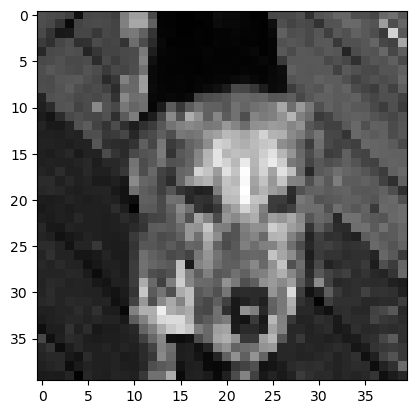

In [57]:
plt.imshow(training_data[0][0], cmap='gray')

In [59]:
random.shuffle(training_data)

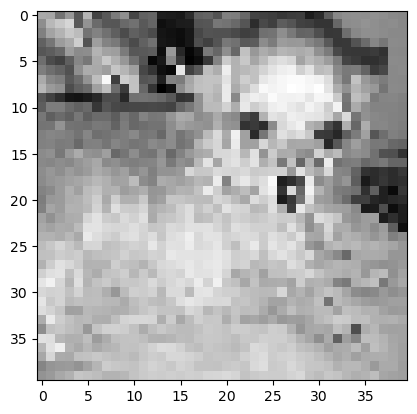

In [60]:
plt.imshow(training_data[0][0], cmap='gray')

In [67]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [68]:
X.shape

(24946, 40, 40)

In [75]:
X[0].shape

(40, 40)

In [76]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [79]:
#save modified data
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [80]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

In [83]:
X.shape

(24946, 40, 40)